### This project is part of a course called "Machine Learning With Python" offered by IBM on Coursera. <sup>[1]</sup>

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

## Download Data

Data source: [Fuel Consumption Ratings, Government of Canada](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)  
Uploaded on IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-09-11 13:15:50--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2019-09-11 13:15:50 (2.87 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Understanding Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [3]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploratory Data Analysis

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<function matplotlib.pyplot.show(*args, **kw)>

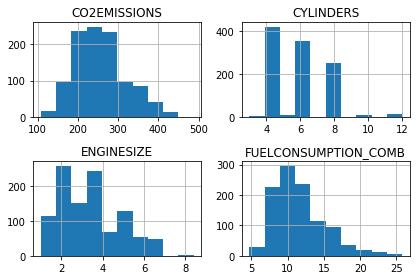

In [5]:
# Getting a subset of important features
cdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.hist()
plt.tight_layout() #adjusts spacing between figures
plt.show

### Observing relationships between CO2 emissions and some features

There seems to be a linear relationship between engine size and CO2 emissions (Figure 2)

Text(602.1720588235295, 0.5, 'Emission')

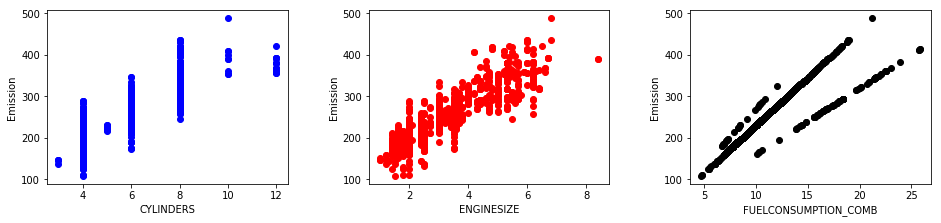

In [6]:
fig, axes = plt.subplots(1,3, figsize=(13, 3))
fig.tight_layout(w_pad=5) 

#plotting CYLINDERS Vs Co2 emission
axes[0].scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
axes[0].set_xlabel("CYLINDERS")
axes[0].set_ylabel("Emission")

#plotting engine_size Vs Co2 emission
axes[1].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
axes[1].set_xlabel("ENGINESIZE")
axes[1].set_ylabel("Emission")

#plotting FUELCONSUMPTION_COMB Vs Co2 emission
axes[2].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='black')
axes[2].set_xlabel("FUELCONSUMPTION_COMB")
axes[2].set_ylabel("Emission")


## Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cdf.loc[:, cdf.columns != 'CO2EMISSIONS'],cdf.CO2EMISSIONS, train_size = 0.8)

#alternate way to split
#msk = np.random.rand(len(df)) < 0.8
#train = cdf[msk]
#test = cdf[~msk]
#X_train = train['ENGINESIZE']
#y_train = train['CO2EMISSIONS']
#X_test = test['ENGINESIZE']
#y_test = test['CO2EMISSIONS']

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Modeling:

In [8]:
# changes shape of data from (n,) to (n,1)
def transform_data(data):
    features = np.asanyarray(data)
    features = features.reshape(-1,1)
    return features
     
def modeling(regr, features, y_train):
    y_train = np.asanyarray(y_train)
    regr.fit(features,y_train)
    # The coefficients
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    return regr

def plotting_best_fit_line(regr,xx, yy):
    plt.scatter(X_train.ENGINESIZE, y_train,  color='blue')
    plt.plot(xx, yy, '-r')
    plt.xlabel("Engine size")
    plt.ylabel("Emission")
    plt.show()

test_scores = list()
train_scores = list()

## Linear Regression

Coefficients:  [39.37007679]
Intercept:  125.30753624621028


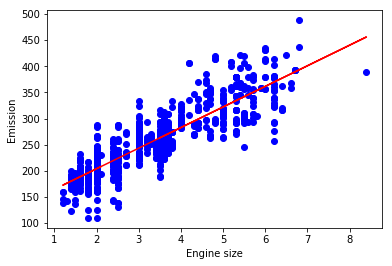

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
features = transform_data(X_train.ENGINESIZE)
regr = modeling(regr, features, y_train)
yy = regr.coef_[0]*X_train.ENGINESIZE + regr.intercept_
plotting_best_fit_line(regr,X_train.ENGINESIZE,yy)

## Model Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
+ **Mean absolute error**: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
+ **Mean Squared Error (MSE)**: Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
+ **Root Mean Squared Error (RMSE)**: This is the square root of the Mean Square Error.
+ **R-squared** is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [10]:
def evaluate_model(regr,features,y_test):
    y_hat = regr.predict(features)

    print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
    print("R2-score: %.2f" % r2_score(y_hat ,y_test) )
    return r2_score(y_hat ,y_test)
    

In [11]:
train_scores.append(evaluate_model(regr, features,y_train))
features = transform_data(X_test.ENGINESIZE)
test_scores.append(evaluate_model(regr, features,y_test))

Mean absolute error: 23.21
Residual sum of squares (MSE): 942.24
R2-score: 0.69
Mean absolute error: 24.12
Residual sum of squares (MSE): 966.52
R2-score: 0.71


## Polynomial Regression

The dependent variable can have quadratic, cubic or higher order dependence on the independent variable. In general regression can be represented as:  
  
$y = \theta_0 + \sum_{i = 1}^{n} \theta_i  x^i$

In case of linear regression, n = 1, in case of quadratic, n = 2 and so on. For polynomial regression of degree n, there are n + 1 parameters to be learned i.e. $\theta_0, \theta_1, ..., \theta_n$  

"**PloynomialFeatures()** *function in Scikit-learn library, drives a new feature sets from the original feature set. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2"* [1]

In [12]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression(degree):
    poly = PolynomialFeatures(degree)
    features = transform_data(X_train.ENGINESIZE)
    transformed_input = poly.fit_transform(features)
    regr = linear_model.LinearRegression()
    regr = modeling(regr, transformed_input, y_train)
    train_scores.append(evaluate_model(regr, transformed_input,y_train))
    XX = np.arange(0.0, 10.0, 0.1)
    yy = regr.intercept_
    for i in range(degree):
        yy = yy + regr.coef_[i+1]*np.power(XX, i+1)
    plotting_best_fit_line(regr,XX,yy)
    poly = PolynomialFeatures(degree)
    features = transform_data(X_test.ENGINESIZE)
    transformed_input = poly.fit_transform(features)
    test_scores.append(evaluate_model(regr, transformed_input,y_test))
    

### Quadratic (n = 2) : 

Coefficients:  [ 0.         50.50477736 -1.49048584]
Intercept:  107.65740232367344
Mean absolute error: 23.26
Residual sum of squares (MSE): 932.89
R2-score: 0.69


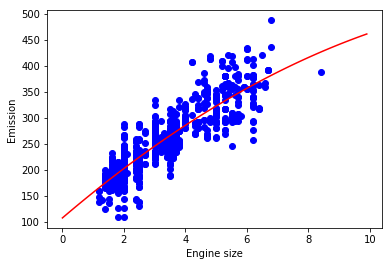

Mean absolute error: 23.80
Residual sum of squares (MSE): 953.34
R2-score: 0.71


In [13]:
polynomial_regression(2)

### Cubic (n = 3) :

Coefficients:  [ 0.         32.89953949  3.41939197 -0.41365956]
Intercept:  126.23221009188595
Mean absolute error: 23.21
Residual sum of squares (MSE): 930.70
R2-score: 0.70


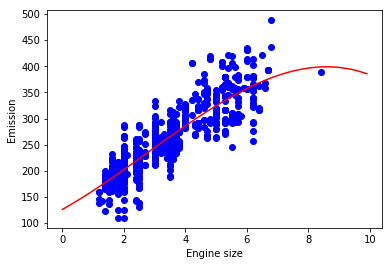

Mean absolute error: 23.69
Residual sum of squares (MSE): 943.51
R2-score: 0.71


In [14]:
polynomial_regression(3)

### Quartic (n = 4) :

Coefficients:  [ 0.00000000e+00  4.03068346e+01  4.04490447e-01  8.35632327e-02
 -2.84822566e-02]
Intercept:  120.10843004250736
Mean absolute error: 23.20
Residual sum of squares (MSE): 930.66
R2-score: 0.70


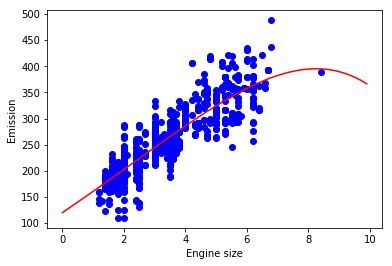

Mean absolute error: 23.66
Residual sum of squares (MSE): 942.45
R2-score: 0.71


In [15]:
polynomial_regression(4)

### Quintic (n = 5) :

Coefficients:  [ 0.00000000e+00  1.12082224e+02 -3.97456196e+01  1.04284346e+01
 -1.26482860e+00  5.52003871e-02]
Intercept:  73.09655435577093
Mean absolute error: 23.20
Residual sum of squares (MSE): 930.01
R2-score: 0.70


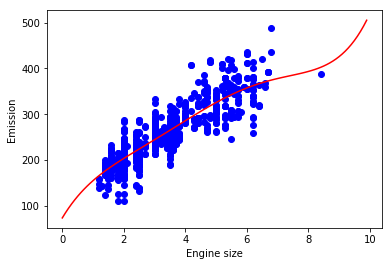

Mean absolute error: 23.49
Residual sum of squares (MSE): 935.06
R2-score: 0.72


In [16]:
polynomial_regression(5)

## Comparison

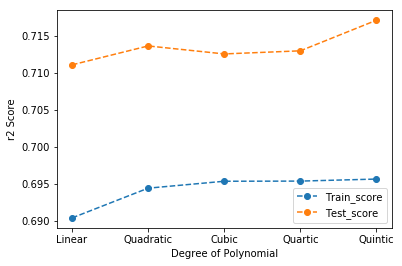

In [20]:
regressions = ('Linear', 'Quadratic', 'Cubic','Quartic','Quintic')
y_pos = np.arange(len(regressions))

fig = plt.figure()
plt.plot(y_pos,train_scores,marker='o', linestyle='dashed')
plt.plot(y_pos,test_scores,marker='o', linestyle='dashed')
plt.xticks(y_pos, regressions)
plt.xlabel('Degree of Polynomial')
plt.ylabel('r2 Score')
plt.legend(('Train_score','Test_score'))

## Non-Linear Regression:

Any kind of regression that is not linear is called non-linear regression. Polynomial regression with n >= 2 is non-linear. 

$$ \ y = \theta_3 x^3 + \theta_2 x^2 + \theta_1 x + \theta_0 \ $$

Non-linear regression can have other operations as well such as exponentials, logarithms, fractions, and others [1]. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(\theta_3 x^3 + \theta_2 x^2 + \theta_1 x + \theta_0)$$

## References:
[1] https://www.coursera.org/learn/machine-learning-with-python/home/welcome